# Import Library


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Flatten, Dropout

print("Packages Successfully Imported!")

Packages Successfully Imported!


# Load Train Data

In [ ]:
trainDataGen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
trainingSet = trainDataGen.flow_from_directory("/content/drive/MyDrive/Ms. Semester 2/Interest Topic CFN/Brain Tumor Classification /dataset/train", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 2800 images belonging to 2 classes.


In [ ]:
trainingSet.class_indices

{'no': 0, 'yes': 1}

# Load Valid Data

In [ ]:
validDataGen = ImageDataGenerator(rescale = 1./255)
validSet = validDataGen.flow_from_directory("/content/drive/MyDrive/Ms. Semester 2/Interest Topic CFN/Brain Tumor Classification /dataset/valid", target_size = (128, 128), batch_size = 32, class_mode = "binary")

Found 200 images belonging to 2 classes.


# Apply Model Architecture

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, input_shape=(128, 128, 3), activation ='relu', padding = 'Same'))
model.add(Conv2D(32, kernel_size = 3,  activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = 3, activation ='relu', padding = 'Same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = 2, strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss = "binary_crossentropy", optimizer='Adamax', metrics=["accuracy"])

# Summary Model

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

# Fit Model

In [ ]:
metricVals = model.fit(x = trainingSet, validation_data = validSet, epochs = 35, verbose = 2)

Epoch 1/35
88/88 - 983s - loss: 4.5331 - accuracy: 0.6811 - val_loss: 10.7377 - val_accuracy: 0.5050 - 983s/epoch - 11s/step
Epoch 2/35
88/88 - 377s - loss: 0.6447 - accuracy: 0.7468 - val_loss: 18.9863 - val_accuracy: 0.5000 - 377s/epoch - 4s/step
Epoch 3/35
88/88 - 373s - loss: 0.4927 - accuracy: 0.7657 - val_loss: 14.2536 - val_accuracy: 0.5050 - 373s/epoch - 4s/step
Epoch 4/35
88/88 - 384s - loss: 0.4720 - accuracy: 0.8021 - val_loss: 8.7795 - val_accuracy: 0.5100 - 384s/epoch - 4s/step
Epoch 5/35
88/88 - 378s - loss: 0.3964 - accuracy: 0.8236 - val_loss: 4.7142 - val_accuracy: 0.5500 - 378s/epoch - 4s/step
Epoch 6/35
88/88 - 376s - loss: 0.3596 - accuracy: 0.8482 - val_loss: 2.7960 - val_accuracy: 0.6400 - 376s/epoch - 4s/step
Epoch 7/35
88/88 - 376s - loss: 0.3217 - accuracy: 0.8582 - val_loss: 1.3447 - val_accuracy: 0.7500 - 376s/epoch - 4s/step
Epoch 8/35
88/88 - 365s - loss: 0.2852 - accuracy: 0.8846 - val_loss: 1.0234 - val_accuracy: 0.7800 - 365s/epoch - 4s/step
Epoch 9/35
8

# Plot Model Loss

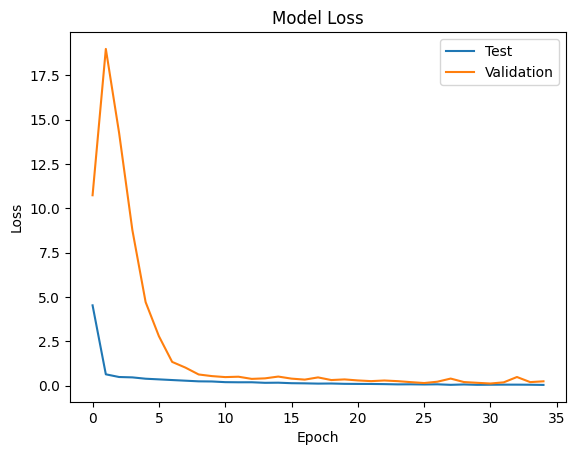

In [ ]:
plt.plot(metricVals.history['loss'])
plt.plot(metricVals.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Plot Model Accuracy

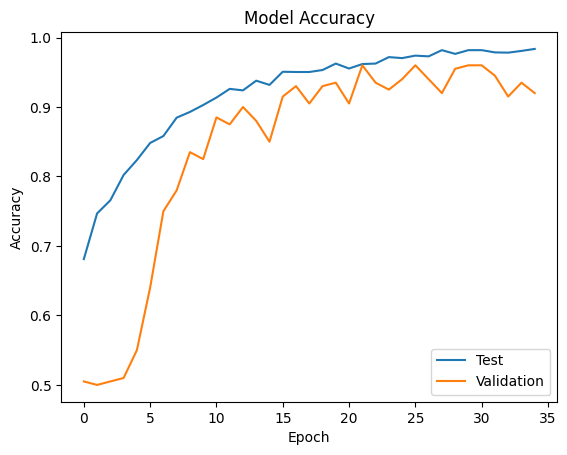

In [ ]:
plt.plot(metricVals.history['accuracy'])
plt.plot(metricVals.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='lower right')
plt.show()

In [ ]:
model.save("BrainTumorClassifier.h5")

In [ ]:
cnn = load_model("BrainTumorClassifier.h5")

# Predict Model with brain Tumor

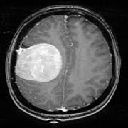

1/1 [==============================] - 0s 368ms/step
100.0 % chance of Brain Tumor.
Yes


In [ ]:
from tensorflow.keras.preprocessing import image
# Yes 1
test = image.load_img("/content/drive/MyDrive/Ms. Semester 2/Interest Topic CFN/Brain Tumor Classification /dataset/test/Y1.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

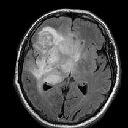

1/1 [==============================] - 0s 232ms/step
99.99945163726807 % chance of Brain Tumor.
Yes


In [ ]:
# Yes 2
test = image.load_img("/content/drive/MyDrive/Ms. Semester 2/Interest Topic CFN/Brain Tumor Classification /dataset/test/Y2.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

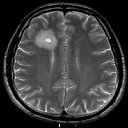

1/1 [==============================] - 0s 238ms/step
99.99997019767761 % chance of Brain Tumor.
Yes


In [ ]:
# Yes 3
test = image.load_img("/content/drive/MyDrive/Ms. Semester 2/Interest Topic CFN/Brain Tumor Classification /dataset/test/Y3.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

# Predict Model without brain Tumor

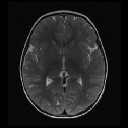

1/1 [==============================] - 0s 104ms/step
8.332555978540768e-06 % chance of Brain Tumor.
No


In [ ]:
# No 1
test = image.load_img("/content/drive/MyDrive/Ms. Semester 2/Interest Topic CFN/Brain Tumor Classification /dataset/test/N1.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

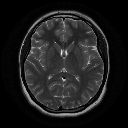

1/1 [==============================] - 0s 114ms/step
0.00011169481695105787 % chance of Brain Tumor.
No


In [ ]:
# No 2
test = image.load_img("/content/drive/MyDrive/Ms. Semester 2/Interest Topic CFN/Brain Tumor Classification /dataset/test/N2.jpeg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")

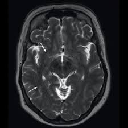

1/1 [==============================] - 0s 62ms/step
0.6020033732056618 % chance of Brain Tumor.
No


In [ ]:
# No 3
test = image.load_img("/content/drive/MyDrive/Ms. Semester 2/Interest Topic CFN/Brain Tumor Classification /dataset/test/N3.jpg", target_size = (128, 128))
display(test)
test = image.img_to_array(test)
test = np.expand_dims(test, 0)
result = cnn.predict(test/255.0)
print("{} % chance of Brain Tumor.".format(result[0][0]*100))
if result[0][0] < 0.5:
    print("No")
else:
    print("Yes")